In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [58]:
fish = pd.read_excel('Top 5 marine creatures 2022 sem 1.xlsx')

In [76]:
# little cleanup of species names.
for i in range(fish.shape[0]):
    species = fish['Species'].iat[i].lower().strip()
    if species.find('sunfish') >= 0:
        species = 'sunfish'
    if species.find('great white shark') == 0:
        species = 'great white sharks'
    if species == 'whaleshark':
        species = 'whale sharks'
    if species.find('orca') >= 0:
        species = 'orca'
    fish['Species'].iat[i] = species


In [82]:
clean = fish.to_csv('clean.csv')

In [77]:
species_rank = fish.pivot_table(index='Species', values=['presence', 'score'], aggfunc=np.sum).sort_values(by='presence', ascending=False)
species_rank[0:5]

,presence,score
Species,,
octopus,11,43
sharks,10,30
whales,9,31
seals,7,16
sea turtles,6,16


In [79]:
# just sharks
sharks = fish[fish['Species'].str.find("shark") >= 0]
sharks
shark_rank = sharks.pivot_table(index='Species', values=['presence', 'score'], aggfunc=np.sum).sort_values(by='presence', ascending=False)
shark_rank[0:5]

,presence,score
Species,,
sharks,10,30
great white sharks,3,5
whale sharks,2,7
cookie cutter shark,1,2
epaulette shark,1,4


In [80]:
tax_rank = fish.pivot_table(index='group', values=['presence', 'score'], aggfunc=np.sum).sort_values(by='presence', ascending=False)
tax_rank[0:5]

,presence,score
group,,
mammal,49,157
fish,30,87
elasmobranch,29,82
Cephalopod,21,68
reptile,17,51


<AxesSubplot:xlabel='group'>

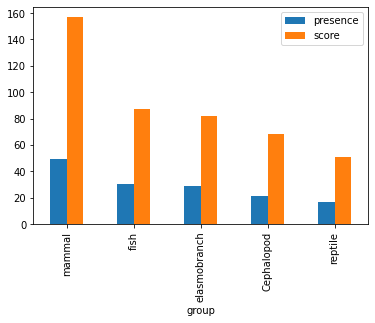

In [81]:
tax_rank[0:5].plot.bar()